In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
import scipy.stats as sps
import json, pickle, os, corner, glob, sys
import enterprise.signals.utils as utils
from enterprise.pulsar import Pulsar
import arviz as az
from collections import defaultdict
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [3]:
import la_forge.diagnostics as dg
import la_forge.core as co
from la_forge.rednoise import plot_rednoise_spectrum, plot_free_spec
from la_forge.utils import epoch_ave_resid

In [4]:
color_cycle_wong = ['#000000','#E69F00','#009E73','#56B4E9','#0072B2','#F0E442','#D55E00','#CC79A7']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_cycle_wong)

In [5]:
current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index("akaiser")
#top_path_idx = splt_path.index("nanograv")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])

In [6]:
e_e_path = top_dir + "/enterprise_extensions/"
sys.path.insert(0, e_e_path)
from enterprise_extensions.timing_2 import get_astrometric_priors
import nltm_plot_utils as nltm

In [7]:
psr_name = 'J1713+0747'#'J1640+2224'#'J2317+1439' 'J1909-3744'

psrlist = [psr_name]
datareleases = ['5yr','9yr','11yr']

psrs = nltm.get_psrs(psrlist,datareleases)
pardict = nltm.get_pardict(psrs,datareleases)

5yr
9yr
11yr


In [8]:
px_priors = get_astrometric_priors(current_path+'/parallaxes.json')
tm_val = float(px_priors[psrlist[0]]['PI'][0])
tm_sigma = 2.0*float(px_priors[psrlist[0]]['PI'][0])
tm_lower_bound = 3.0*float(px_priors[psrlist[0]]['eminus'][0])
tm_upper_bound = 3.0*float(px_priors[psrlist[0]]['eplus'][0])

# Make Lists of Chain Directories to Load

In [9]:
chaindir_list = []
#indices = np.arange(1,6,1)
indices = [1]
#big_chaindir = os.getcwd()+'/chains/{}_all_var'.format(psr)
for i in indices:
    for datarelease in datareleases:
        chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_uniform_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
        chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_bounded_normal_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
        chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_uniform_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
        chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_bounded_normal_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
        """
        if datarelease in ['5yr','9yr'] and i in [1,3,4]:
            if i == 1:
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_uniform_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_bounded_normal_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
            else:
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_testing_uniform_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_testing_bounded_normal_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
        elif datarelease in ['11yr'] and i in [1,2]:
            if i == 1:
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_uniform_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
                chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_bounded_normal_RV_True_WV_True_PX_tm_{}'.format(psr_name,datarelease,psr_name,i))
            chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_testing_uniform_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
            chaindir_list.append(os.getcwd()+'/{}/chains/{}/{}_testing_bounded_normal_RV_True_WV_True_tm_{}'.format(psr_name,datarelease,psr_name,i))
        """
[print(chaindir) for chaindir in chaindir_list];

/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/5yr/J1713+0747_uniform_RV_True_WV_True_PX_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/5yr/J1713+0747_bounded_normal_RV_True_WV_True_PX_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/5yr/J1713+0747_uniform_RV_True_WV_True_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/5yr/J1713+0747_bounded_normal_RV_True_WV_True_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/9yr/J1713+0747_uniform_RV_True_WV_True_PX_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/9yr/J1713+0747_bounded_normal_RV_True_WV_True_PX_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/9yr/J1713+0747_uniform_RV_True_WV_True_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/9yr/J1713+0747_bounded_normal_RV_True_WV_True_tm_1
/hyrule/data/users/akaiser/enterprise_timing/J1713+0747/chains/11yr/J1713+0747_uniform_RV_True_WV_True_P

# Load Chains and Parameters into a Dictionary

In [10]:
chain_dict = nltm.get_chain_tmparam_dict(chaindir_list)

5yr J1713+0747_uniform_RV_True_WV_True_PX_tm_1 Loaded.      
5yr J1713+0747_bounded_normal_RV_True_WV_True_PX_tm_1 Loaded.      
5yr J1713+0747_uniform_RV_True_WV_True_tm_1 Loaded.      
5yr J1713+0747_bounded_normal_RV_True_WV_True_tm_1 Loaded.      
9yr J1713+0747_uniform_RV_True_WV_True_PX_tm_1 Loaded.      
9yr J1713+0747_bounded_normal_RV_True_WV_True_PX_tm_1 Loaded.      
9yr J1713+0747_uniform_RV_True_WV_True_tm_1 Loaded.      
9yr J1713+0747_bounded_normal_RV_True_WV_True_tm_1 Loaded.      
11yr J1713+0747_uniform_RV_True_WV_True_PX_tm_1 Loaded.      
11yr J1713+0747_bounded_normal_RV_True_WV_True_PX_tm_1 Loaded.      
11yr J1713+0747_uniform_RV_True_WV_True_tm_1 Loaded.      
11yr J1713+0747_bounded_normal_RV_True_WV_True_tm_1 Loaded.      


In [11]:
print(chain_dict.keys())
print('')
print(chain_dict['uniform'].keys())
print('')
print(chain_dict['uniform']['px_priors'].keys())
print('')
print(chain_dict['uniform']['px_priors']['5yr'].keys())
print('')
print(np.shape(chain_dict['uniform']['other']['5yr']['chains']))
print(np.shape(chain_dict['uniform']['px_priors']['5yr']['chains']))
print(np.shape(chain_dict['bounded']['other']['5yr']['chains']))
print(np.shape(chain_dict['bounded']['px_priors']['5yr']['chains']))
print('')
print(pardict.keys())
print(pardict['9yr']['{}'.format(psrlist[0])].keys())

dict_keys(['uniform', 'bounded', 'misc'])

dict_keys(['px_priors', 'other'])

dict_keys(['5yr', '9yr', '11yr'])

dict_keys(['chains', 'tmparams'])

(1, 149925, 28)
(1, 149925, 28)
(1, 149925, 28)
(1, 149925, 28)

dict_keys(['5yr', '9yr', '11yr'])
dict_keys(['F0', 'F1', 'PMELONG', 'PMELAT', 'PX', 'SINI', 'PB', 'T0', 'A1', 'OM', 'ECC', 'XDOT', 'M2'])


# Make a List of `la_forge` Cores

In [12]:
core_list = []
for chaindir in chaindir_list:
    core_list.append(co.Core(label='_'.join(chaindir.split('/')[-2:]), chaindir=chaindir))

Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 49975
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.
Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 49975
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.
Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 49975
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Ple

# Plot Cores with `la_forge`

### 5yr Cores

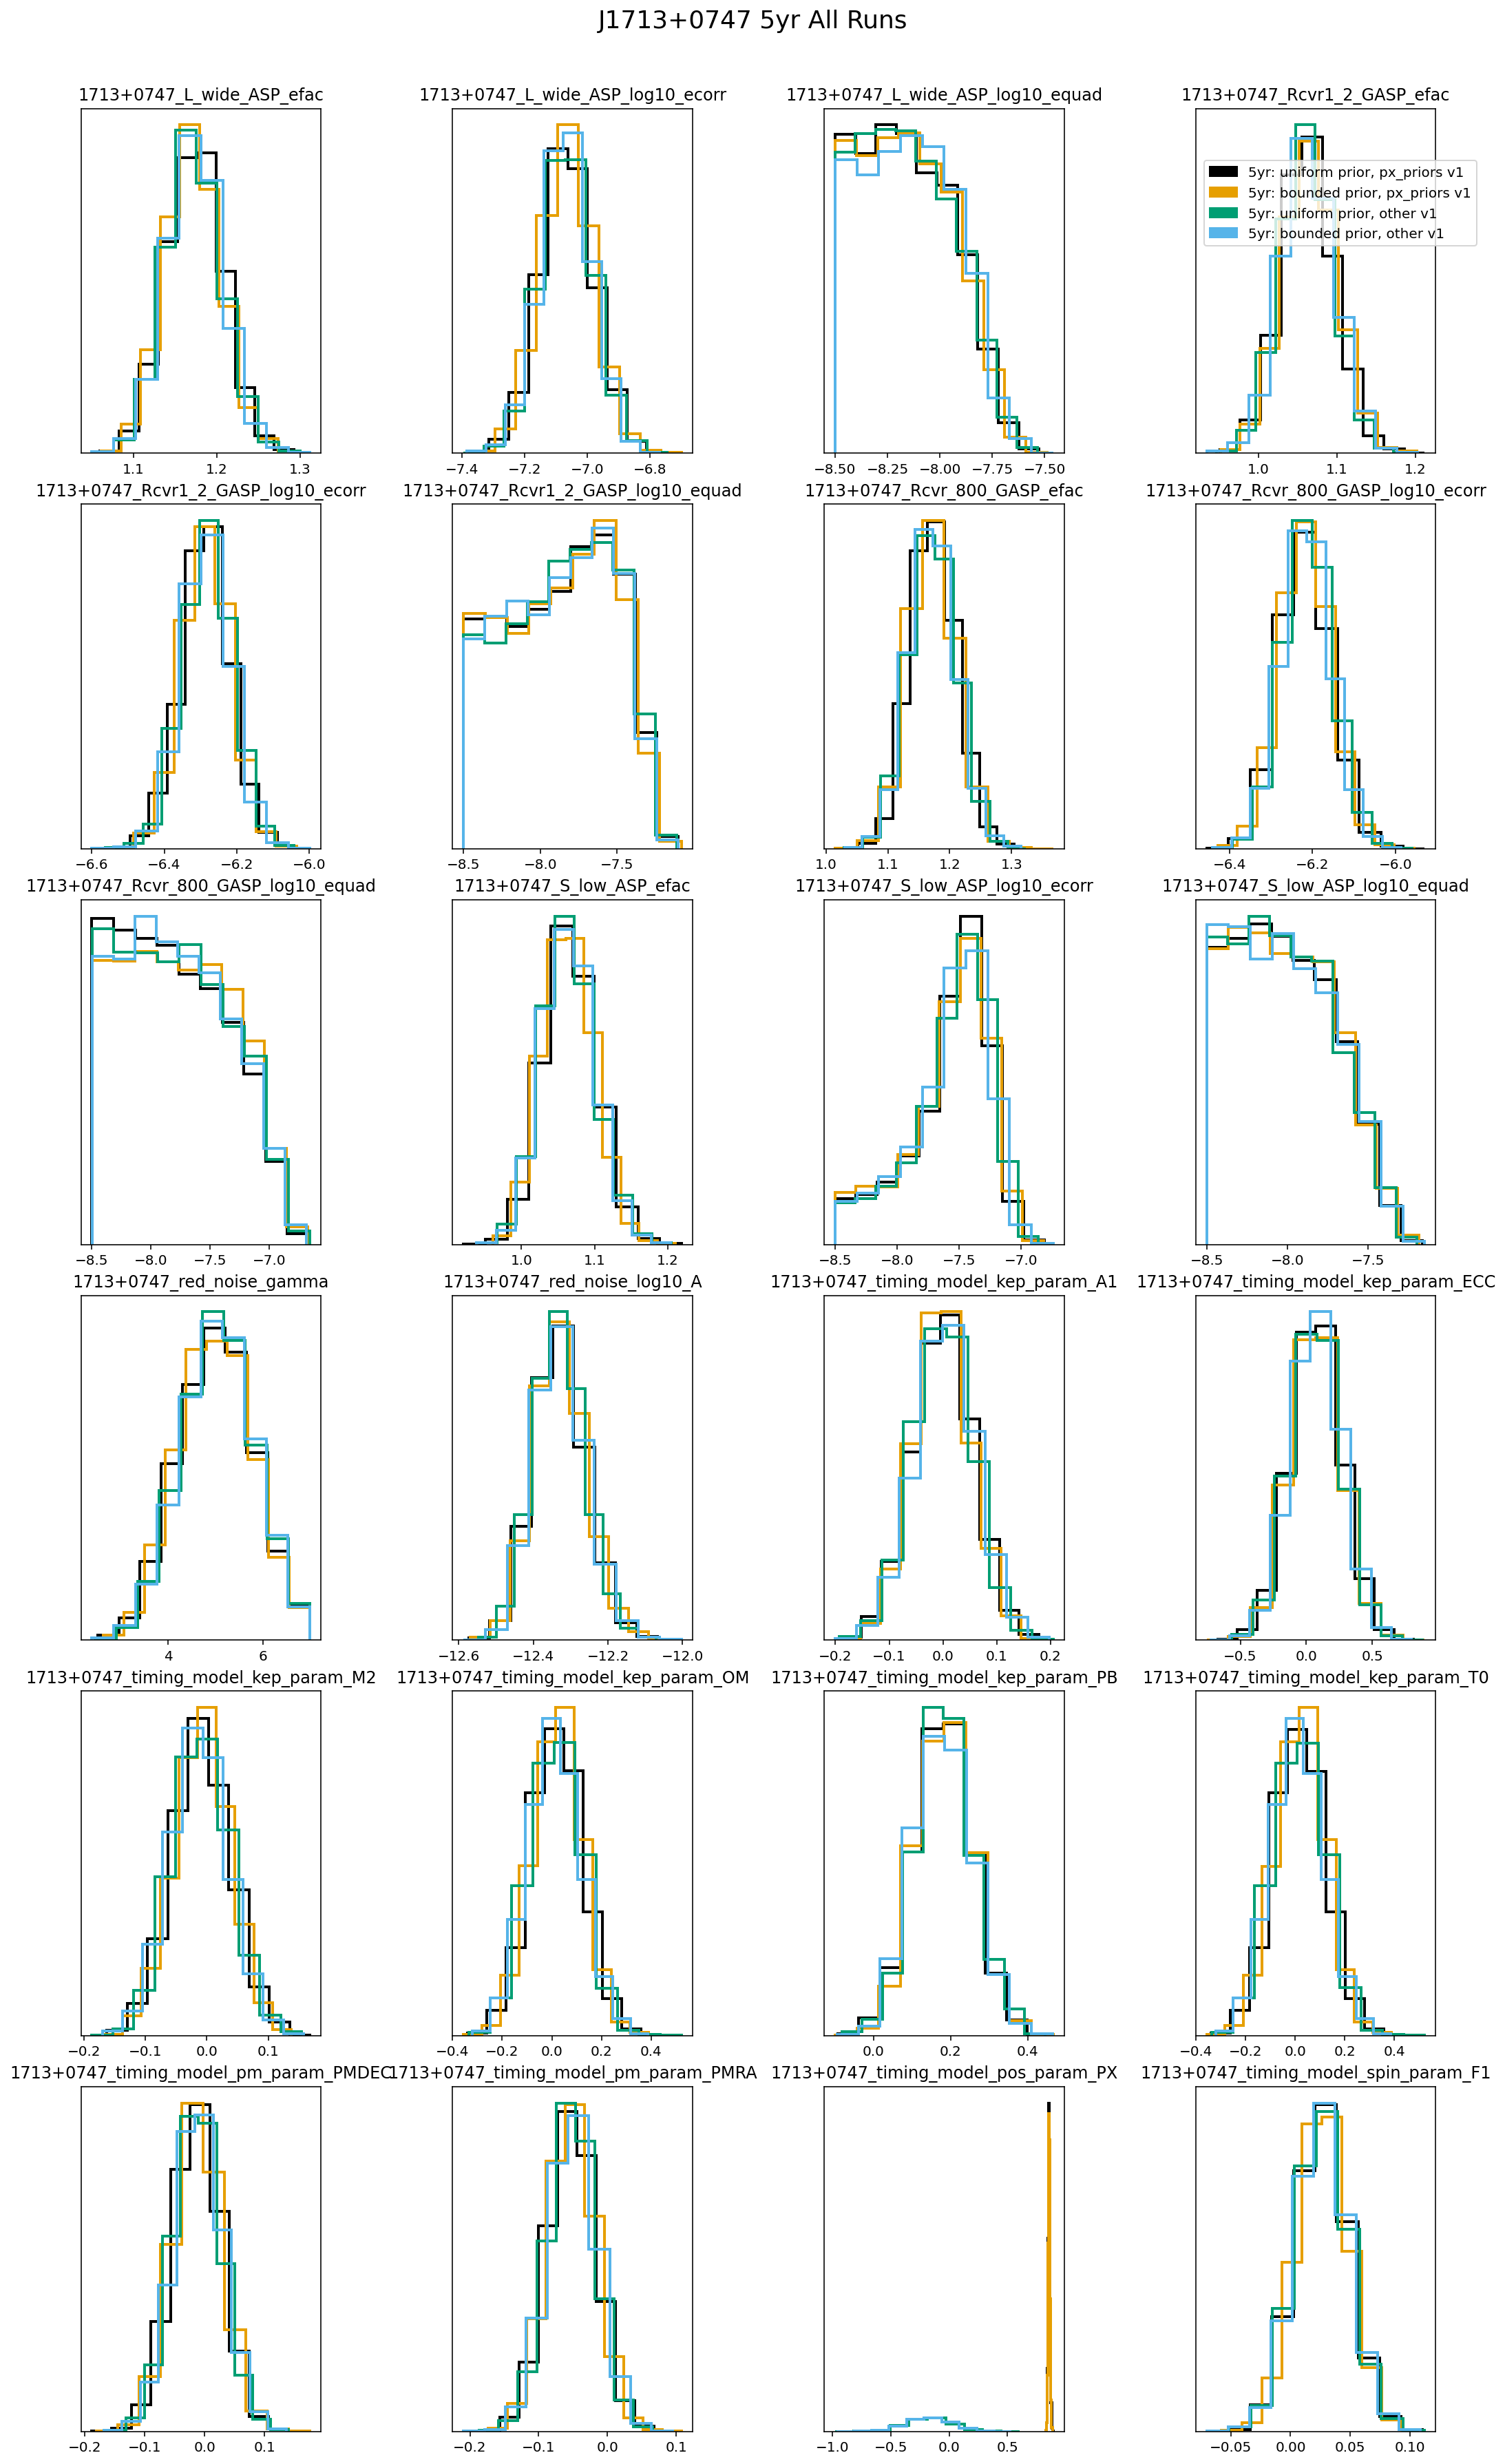

In [13]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 5yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(core_list,chaindir_list,priors,px_priors,'5yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

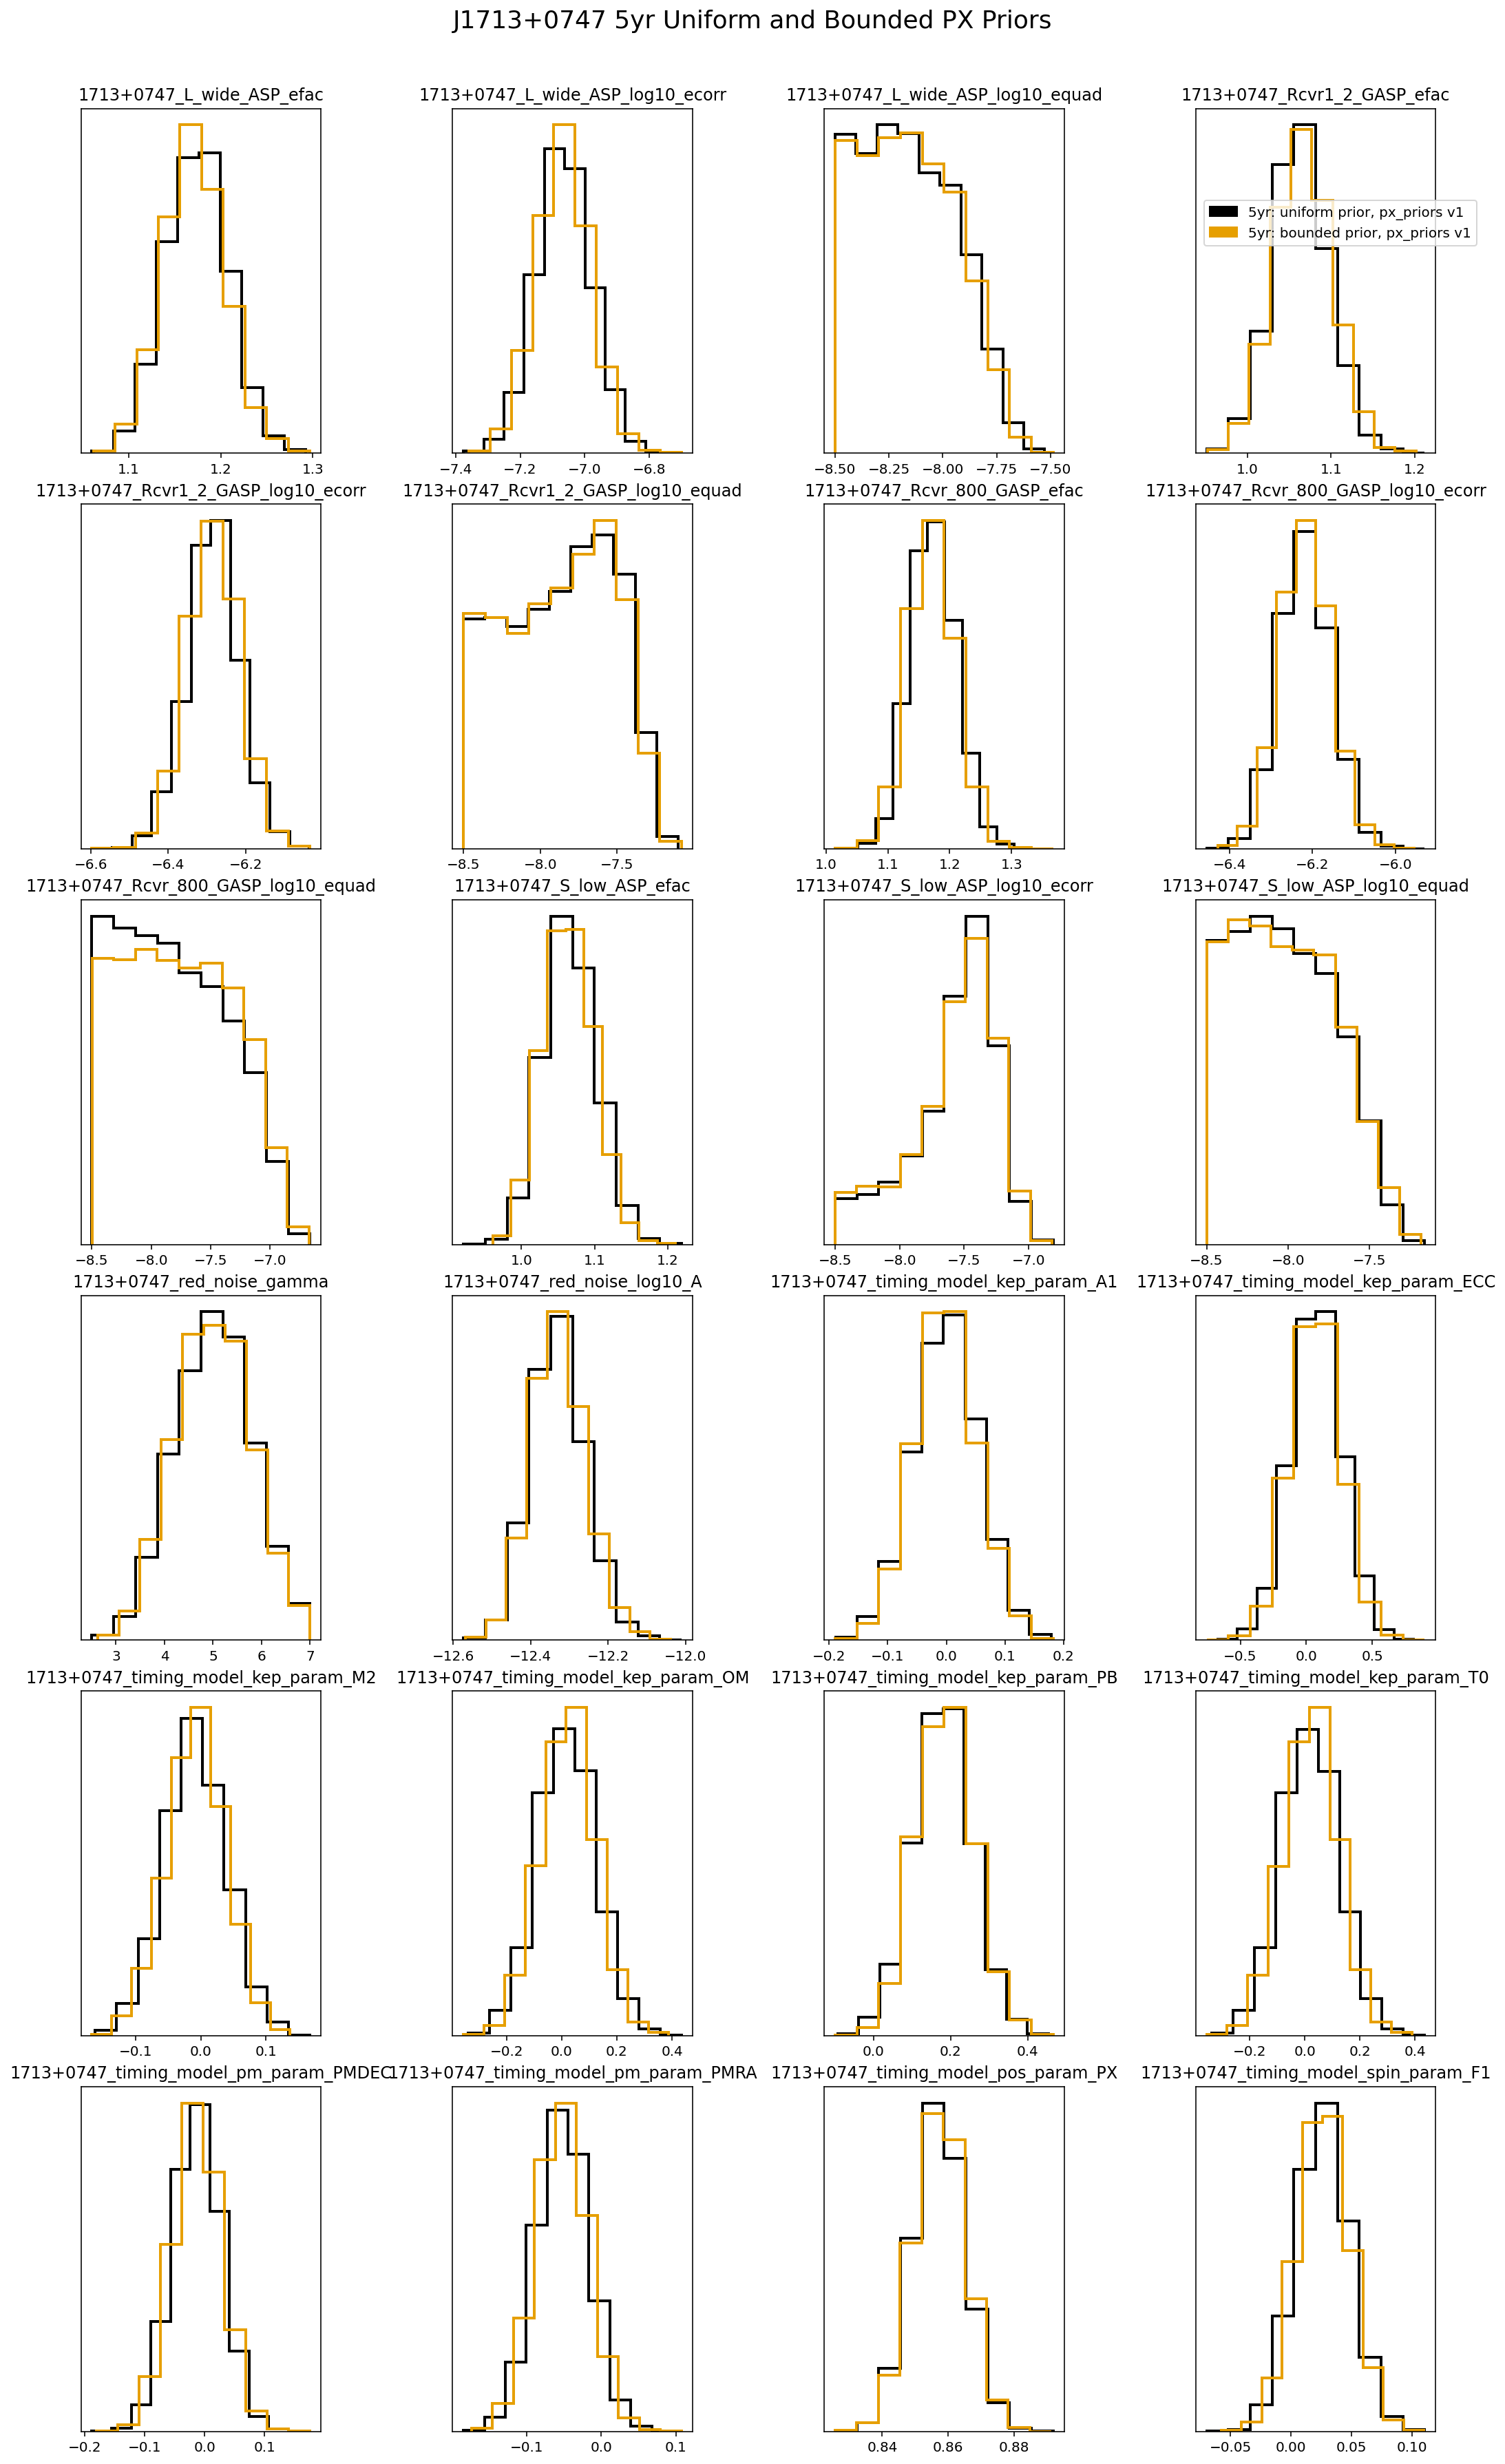

In [14]:
#PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 5yr Uniform and Bounded PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'px_priors','5yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

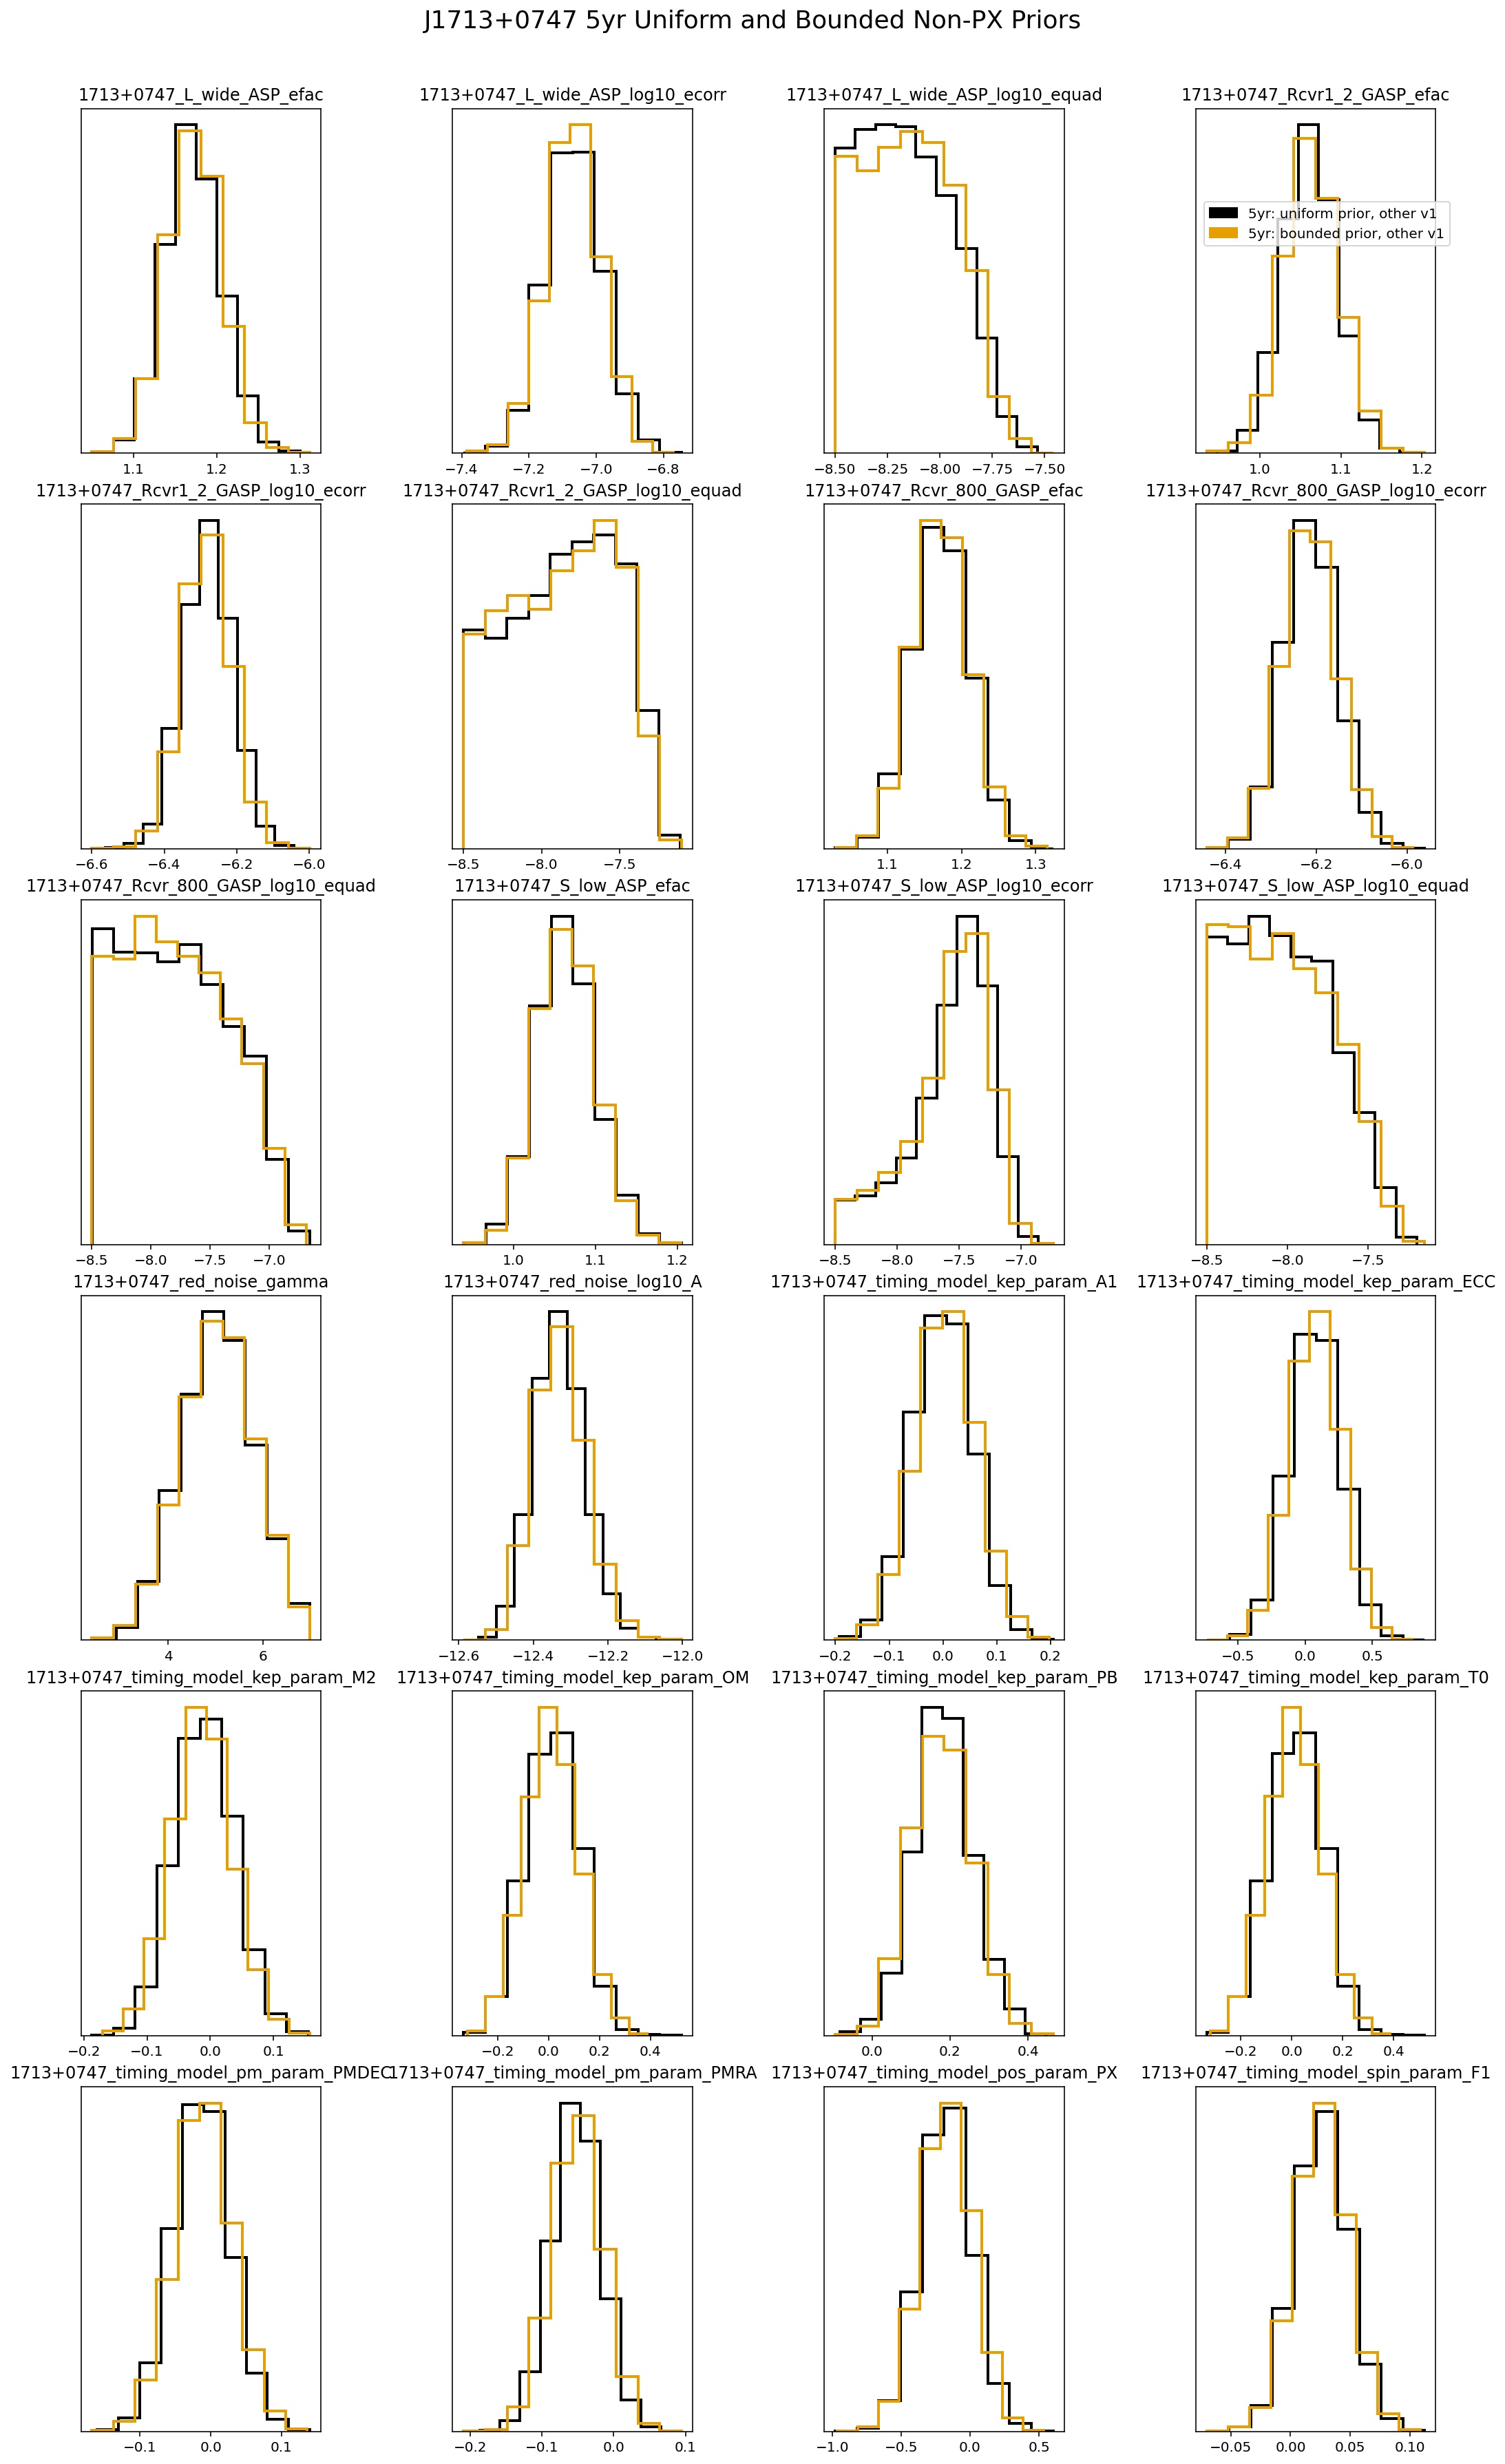

In [15]:
#Non-PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 5yr Uniform and Bounded Non-PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'other','5yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

### 9yr Cores

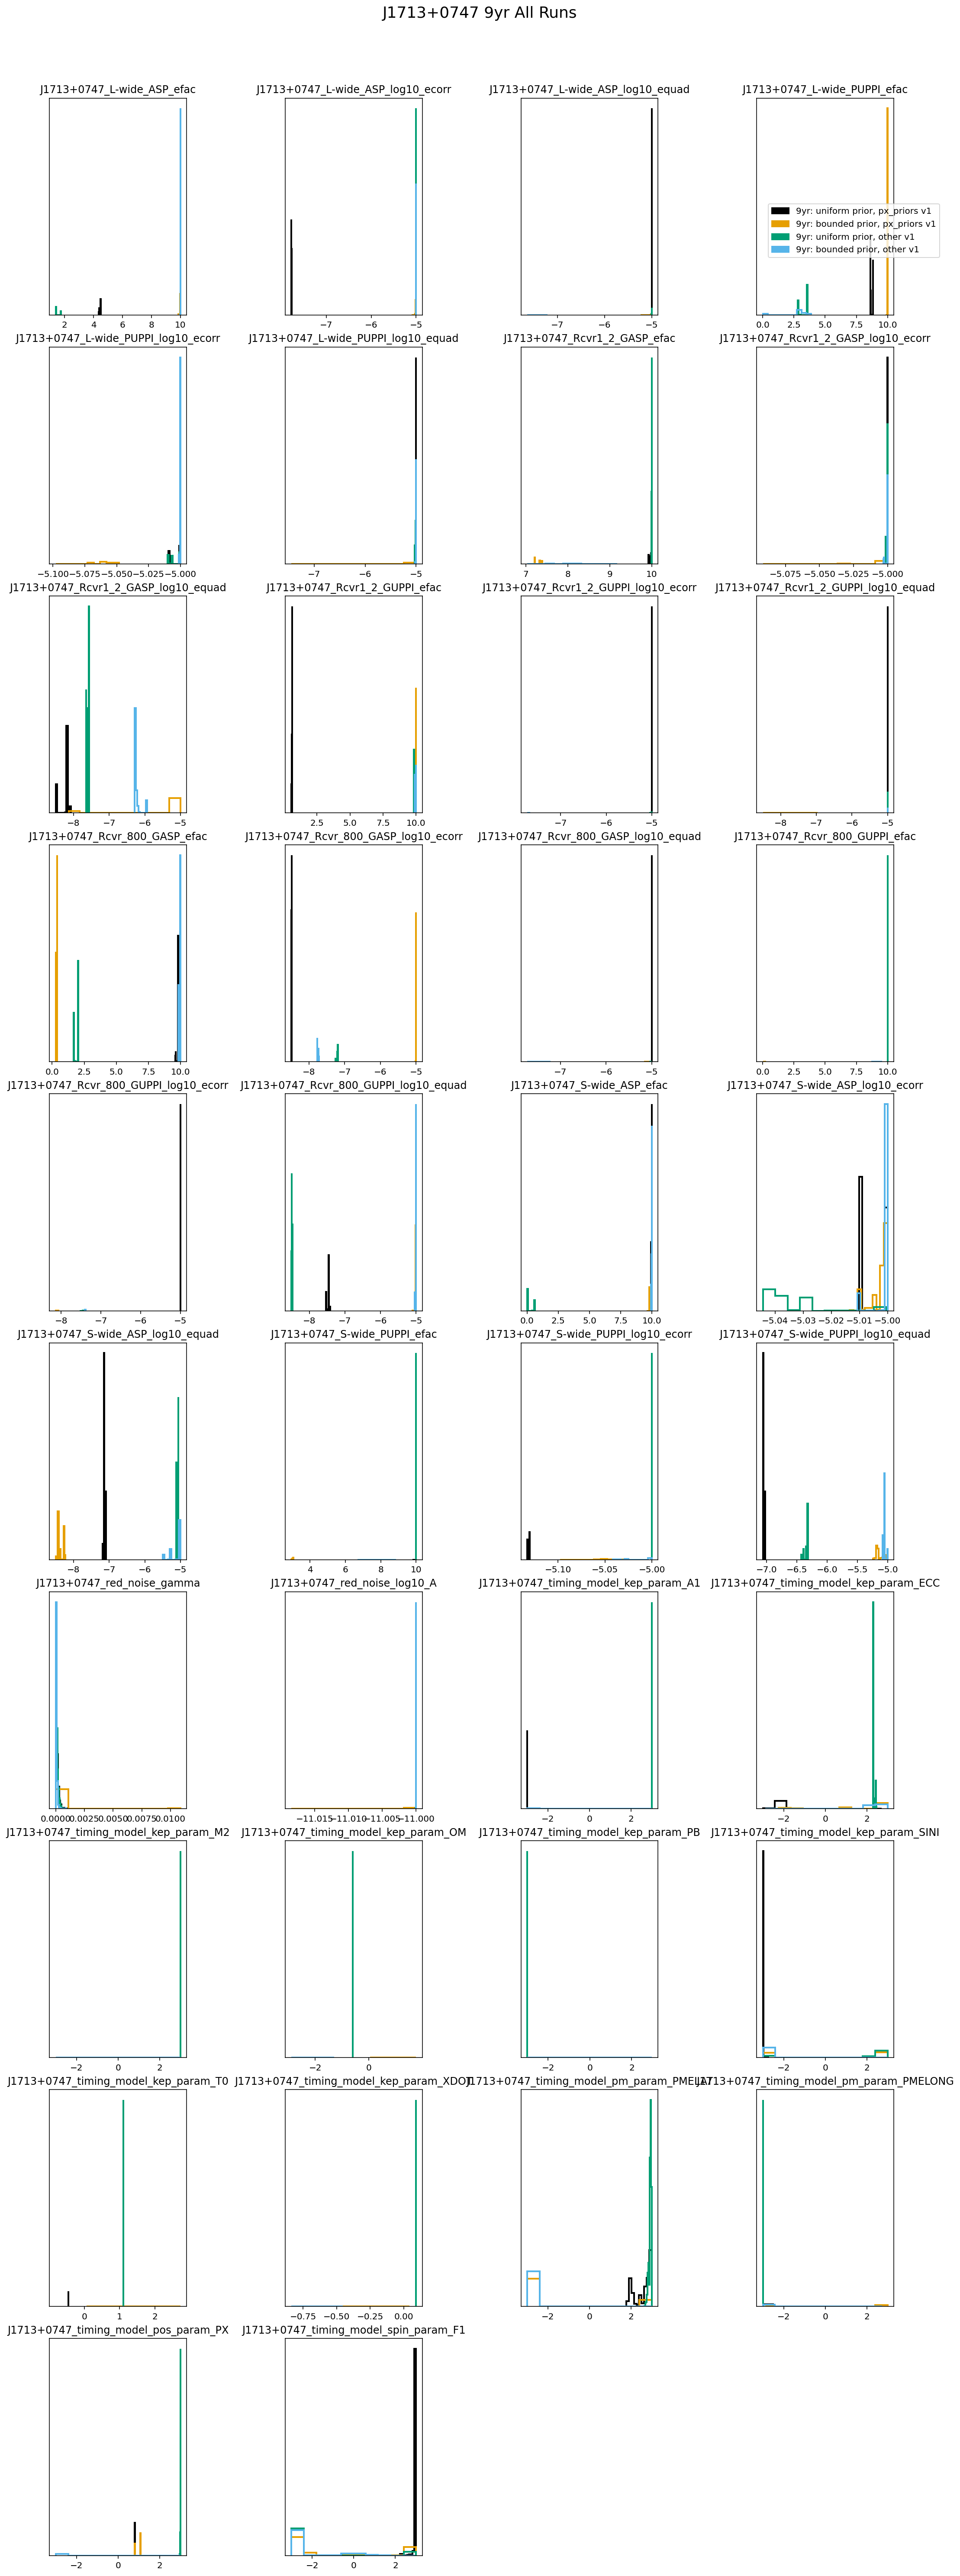

In [16]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 9yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(core_list,chaindir_list,priors,px_priors,'9yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

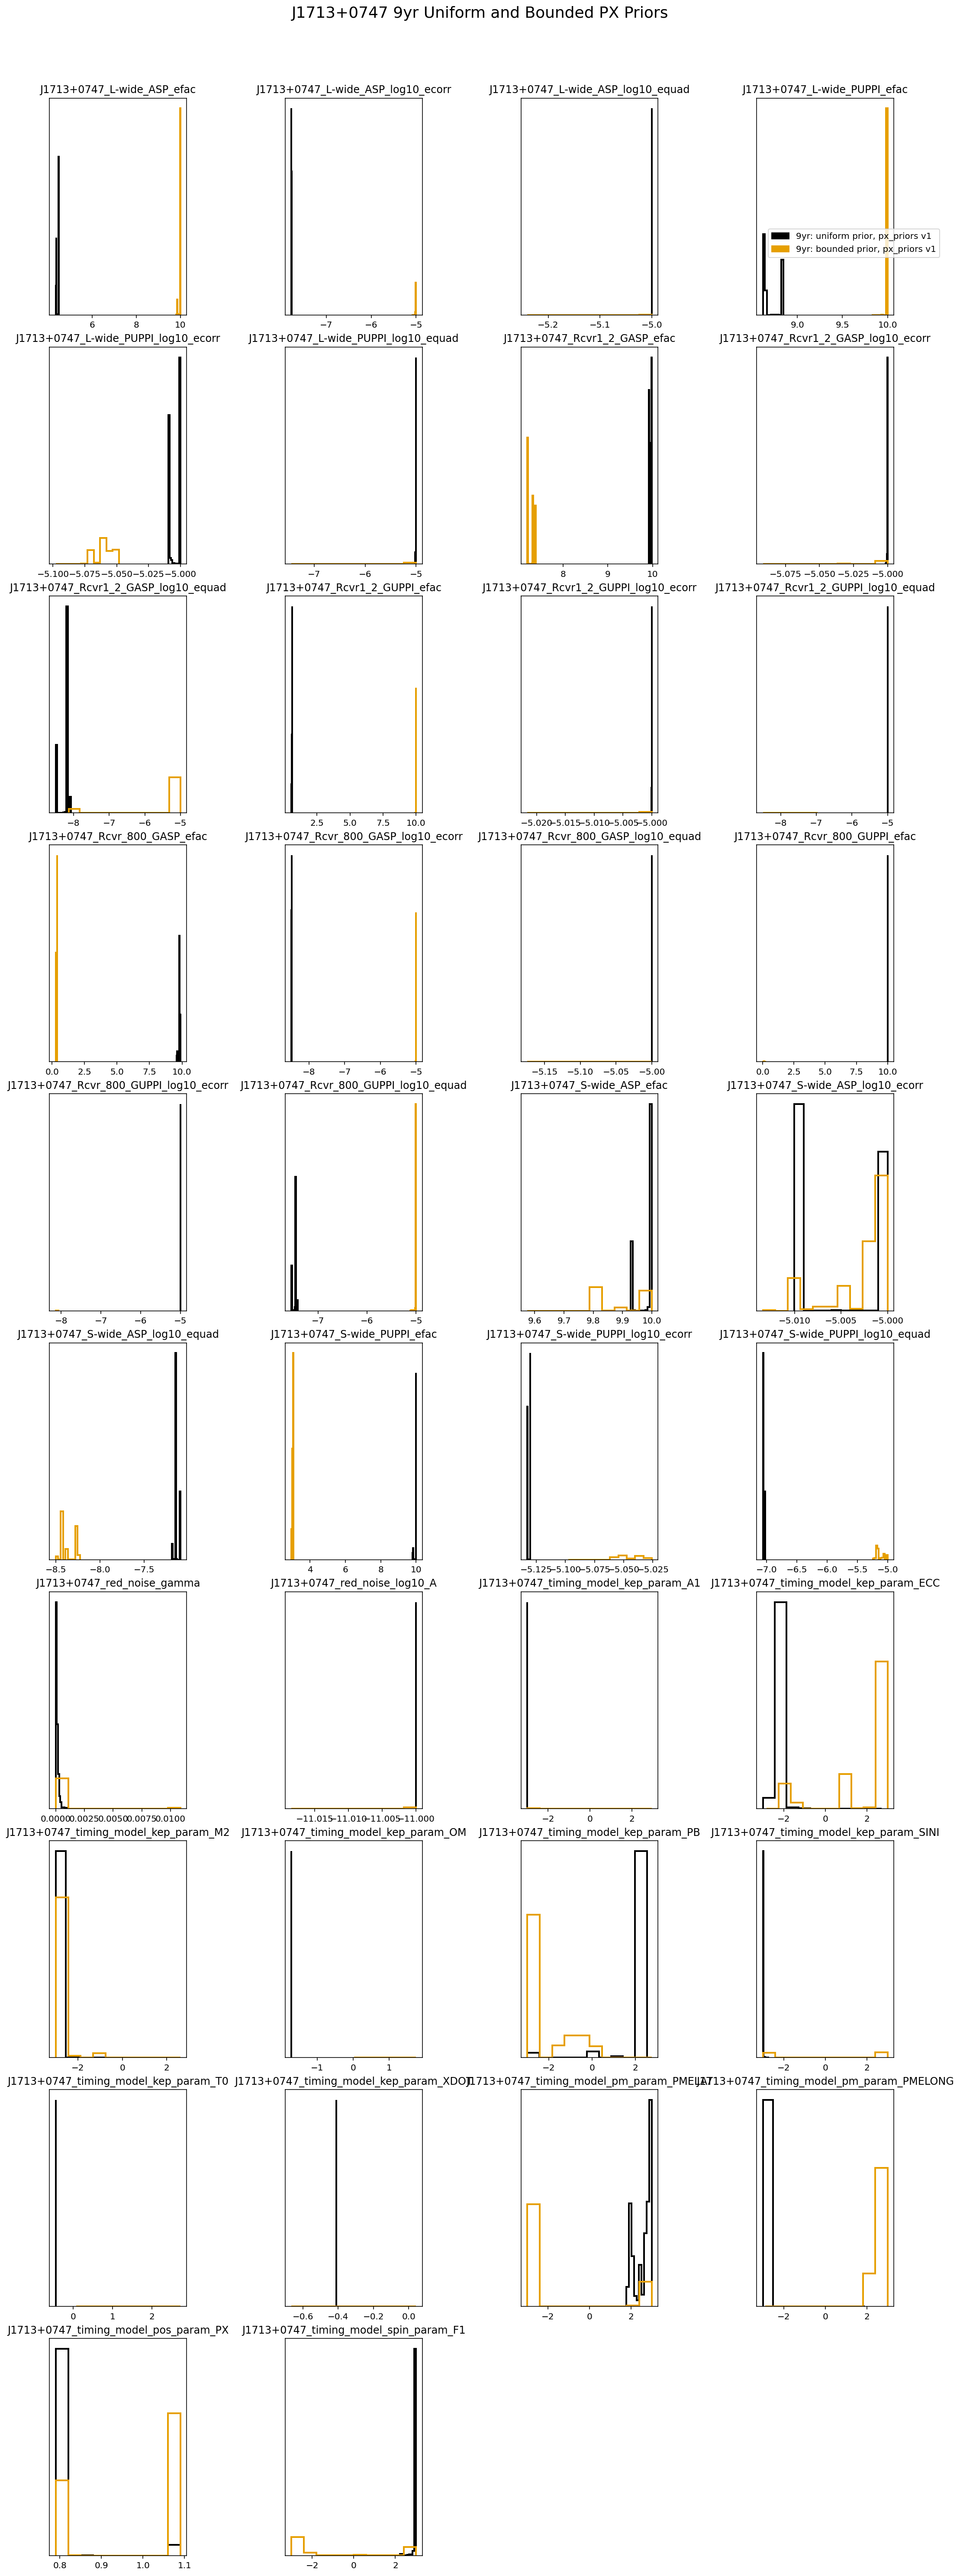

In [17]:
#PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 9yr Uniform and Bounded PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'px_priors','9yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

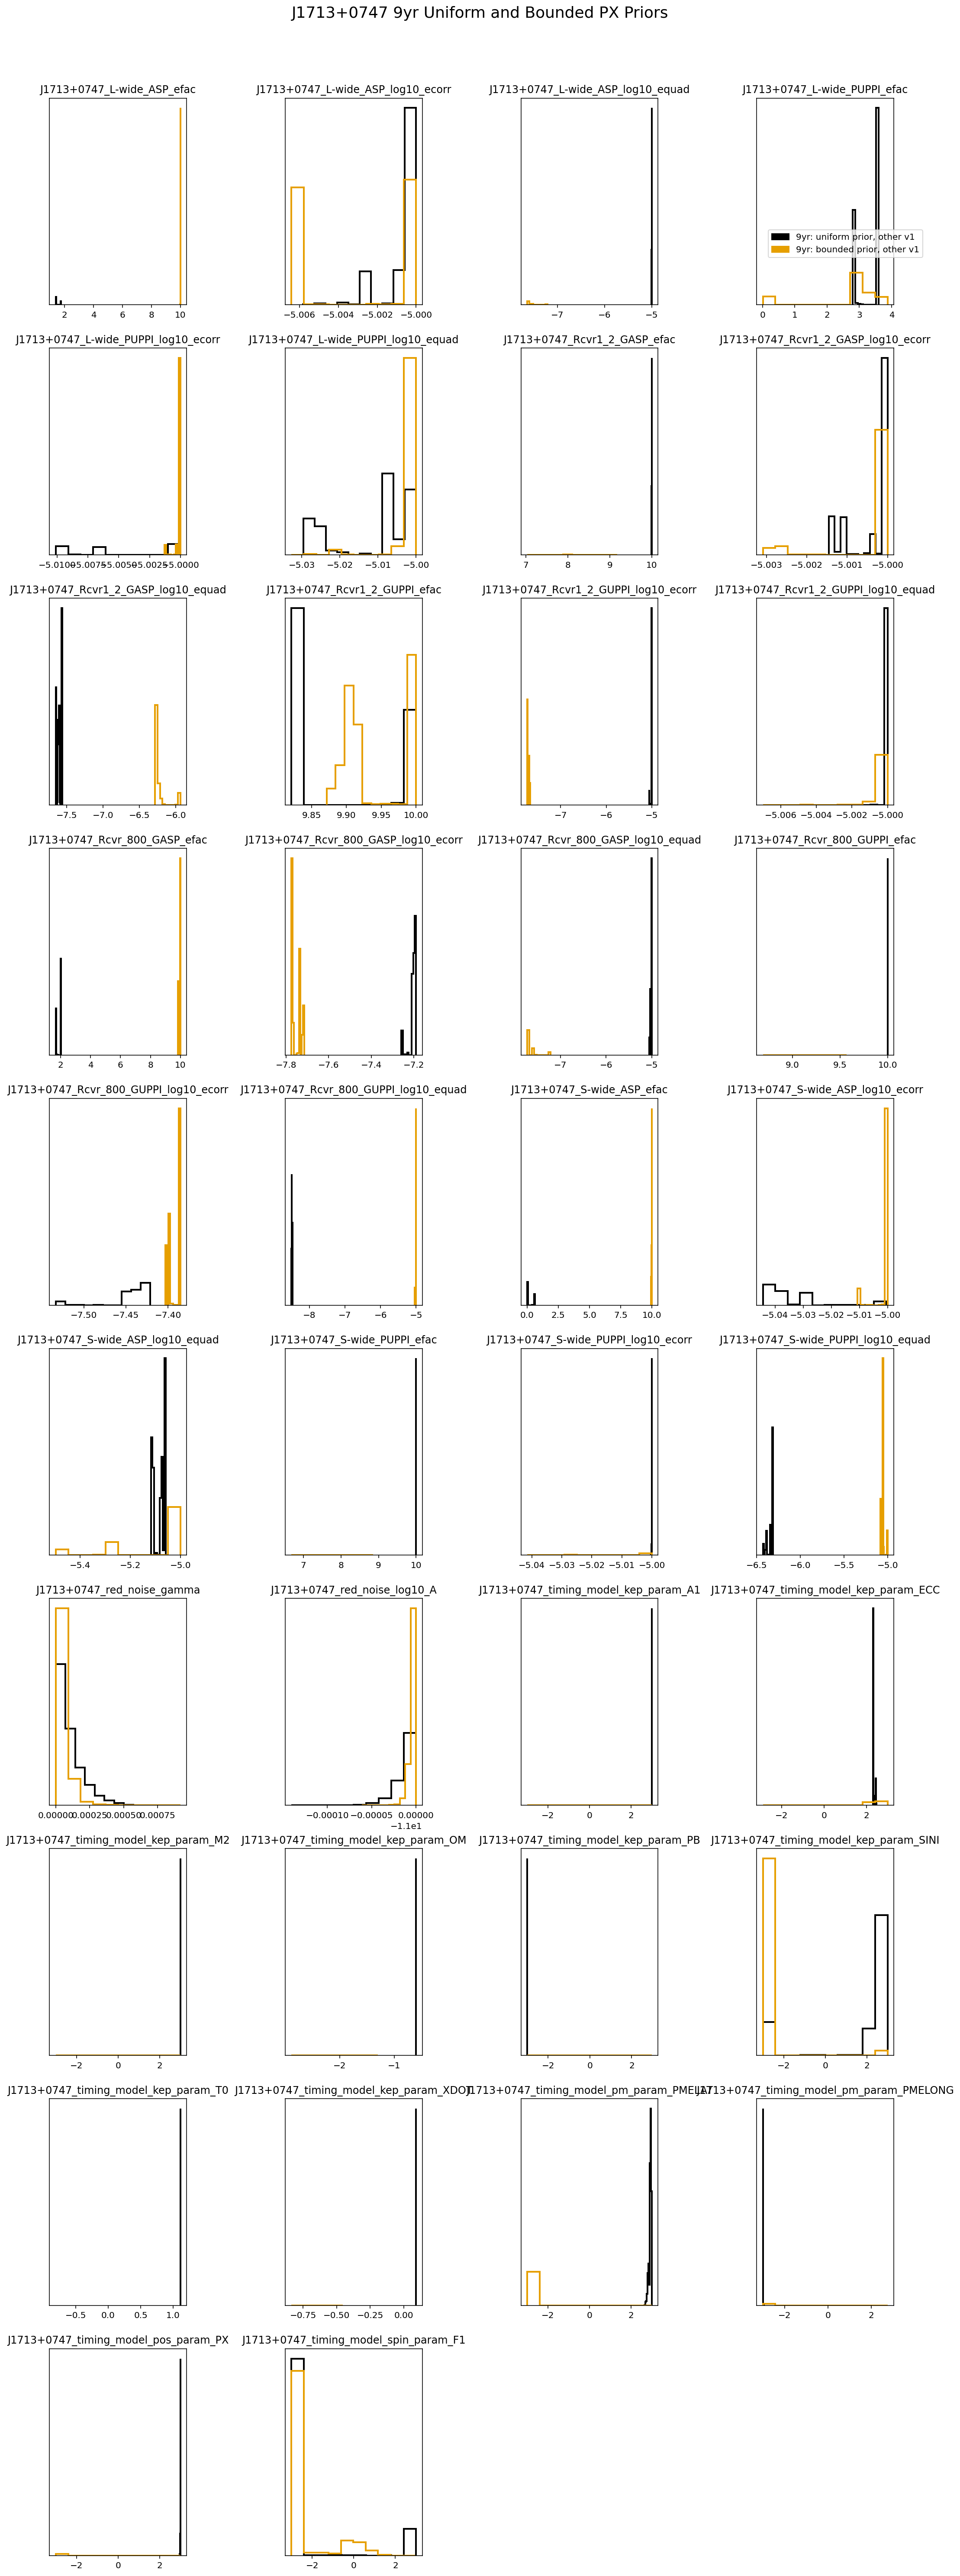

In [18]:
#Non-PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 9yr Uniform and Bounded PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'other','9yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

### 11yr Cores

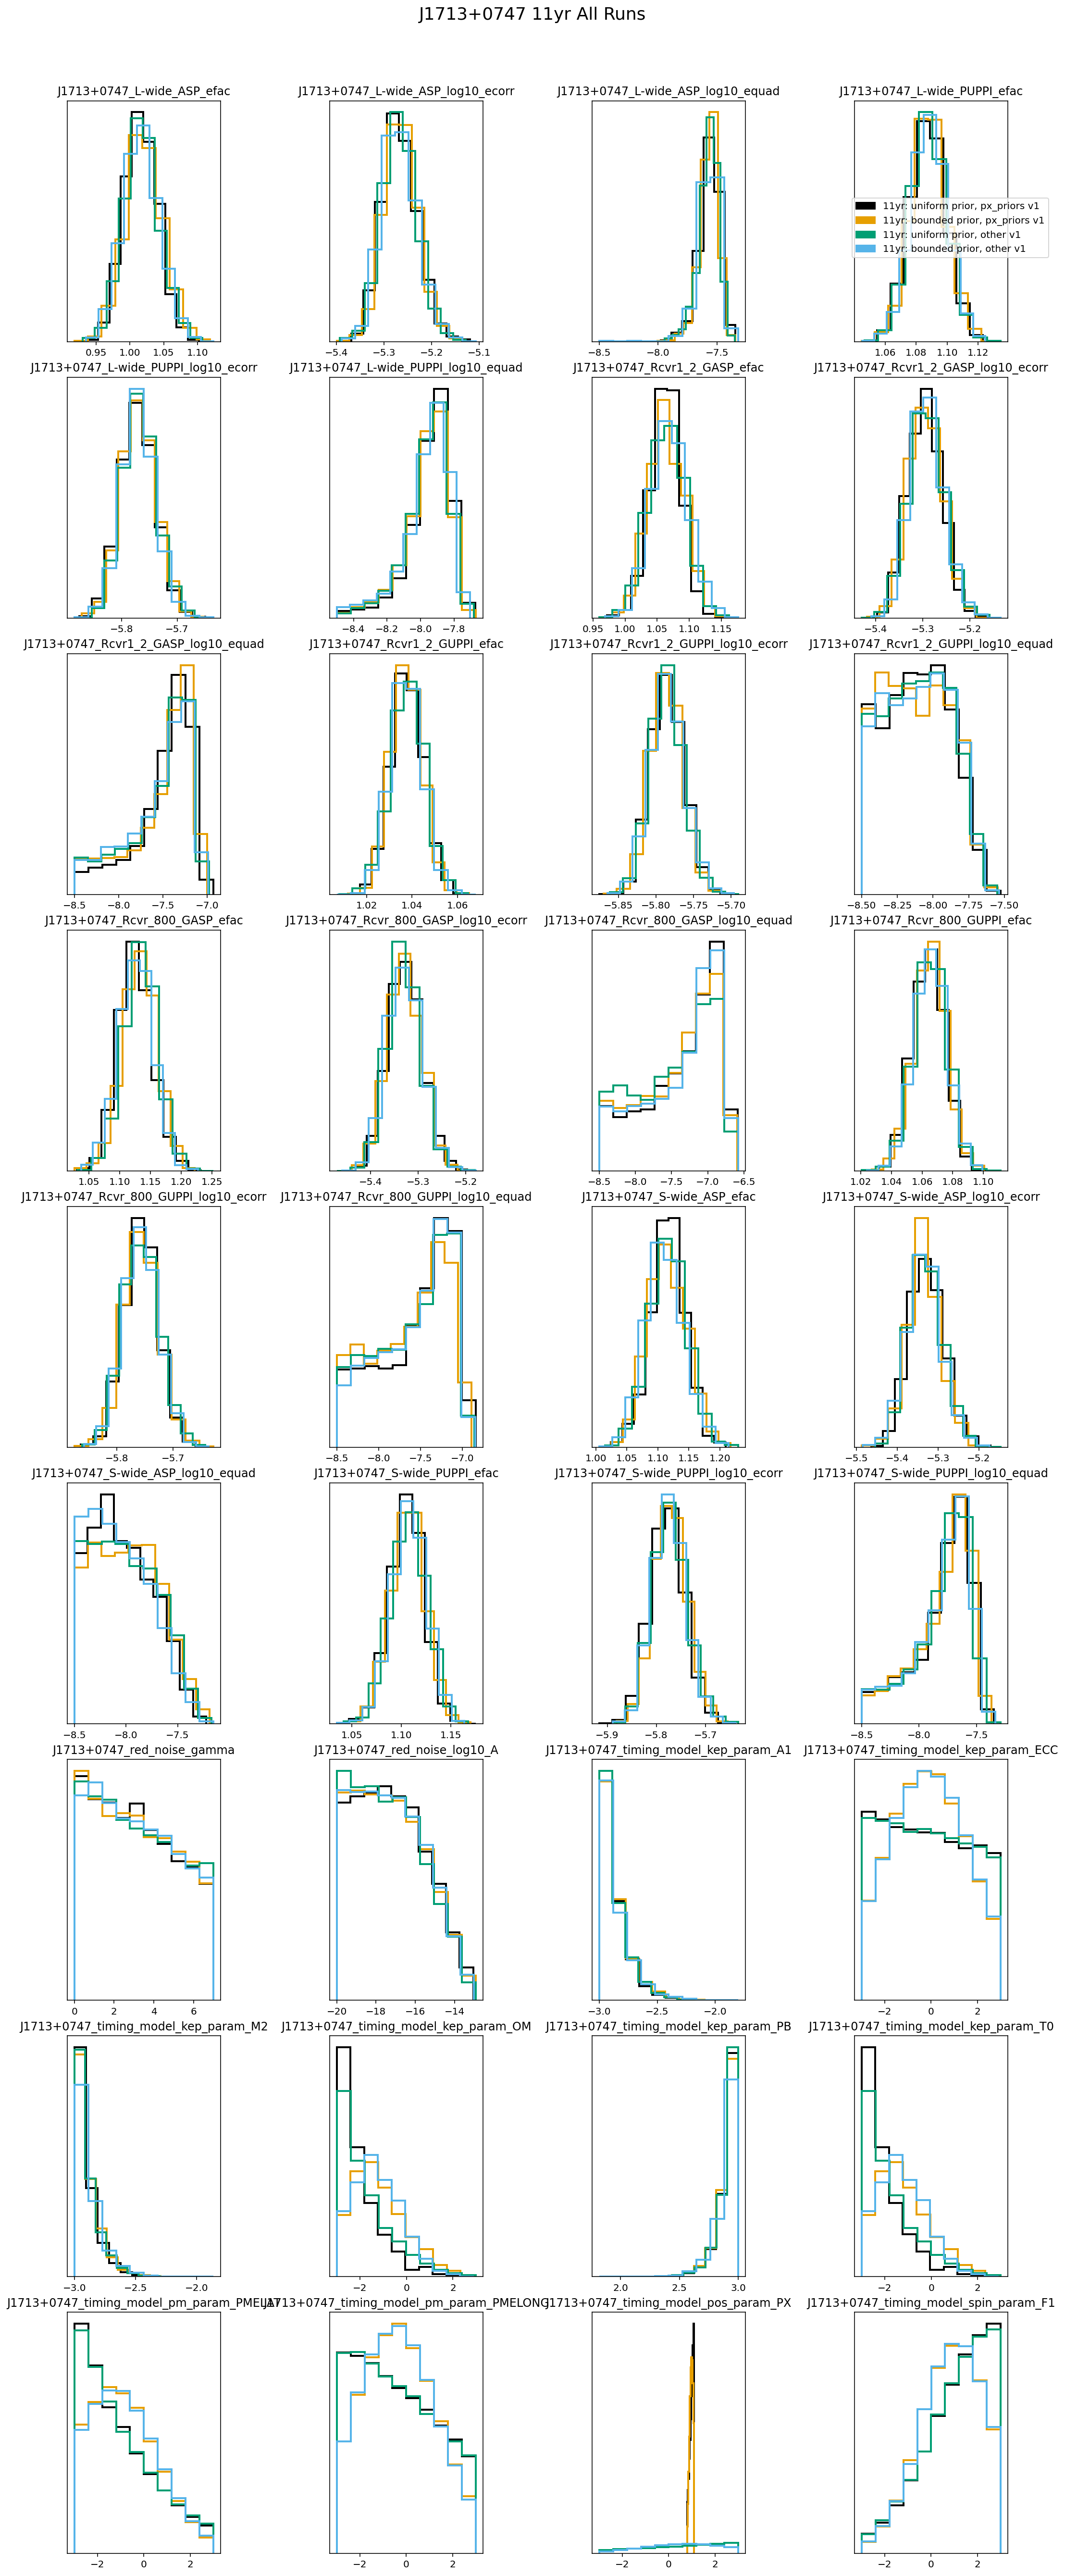

In [19]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 11yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(core_list,chaindir_list,priors,px_priors,'11yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

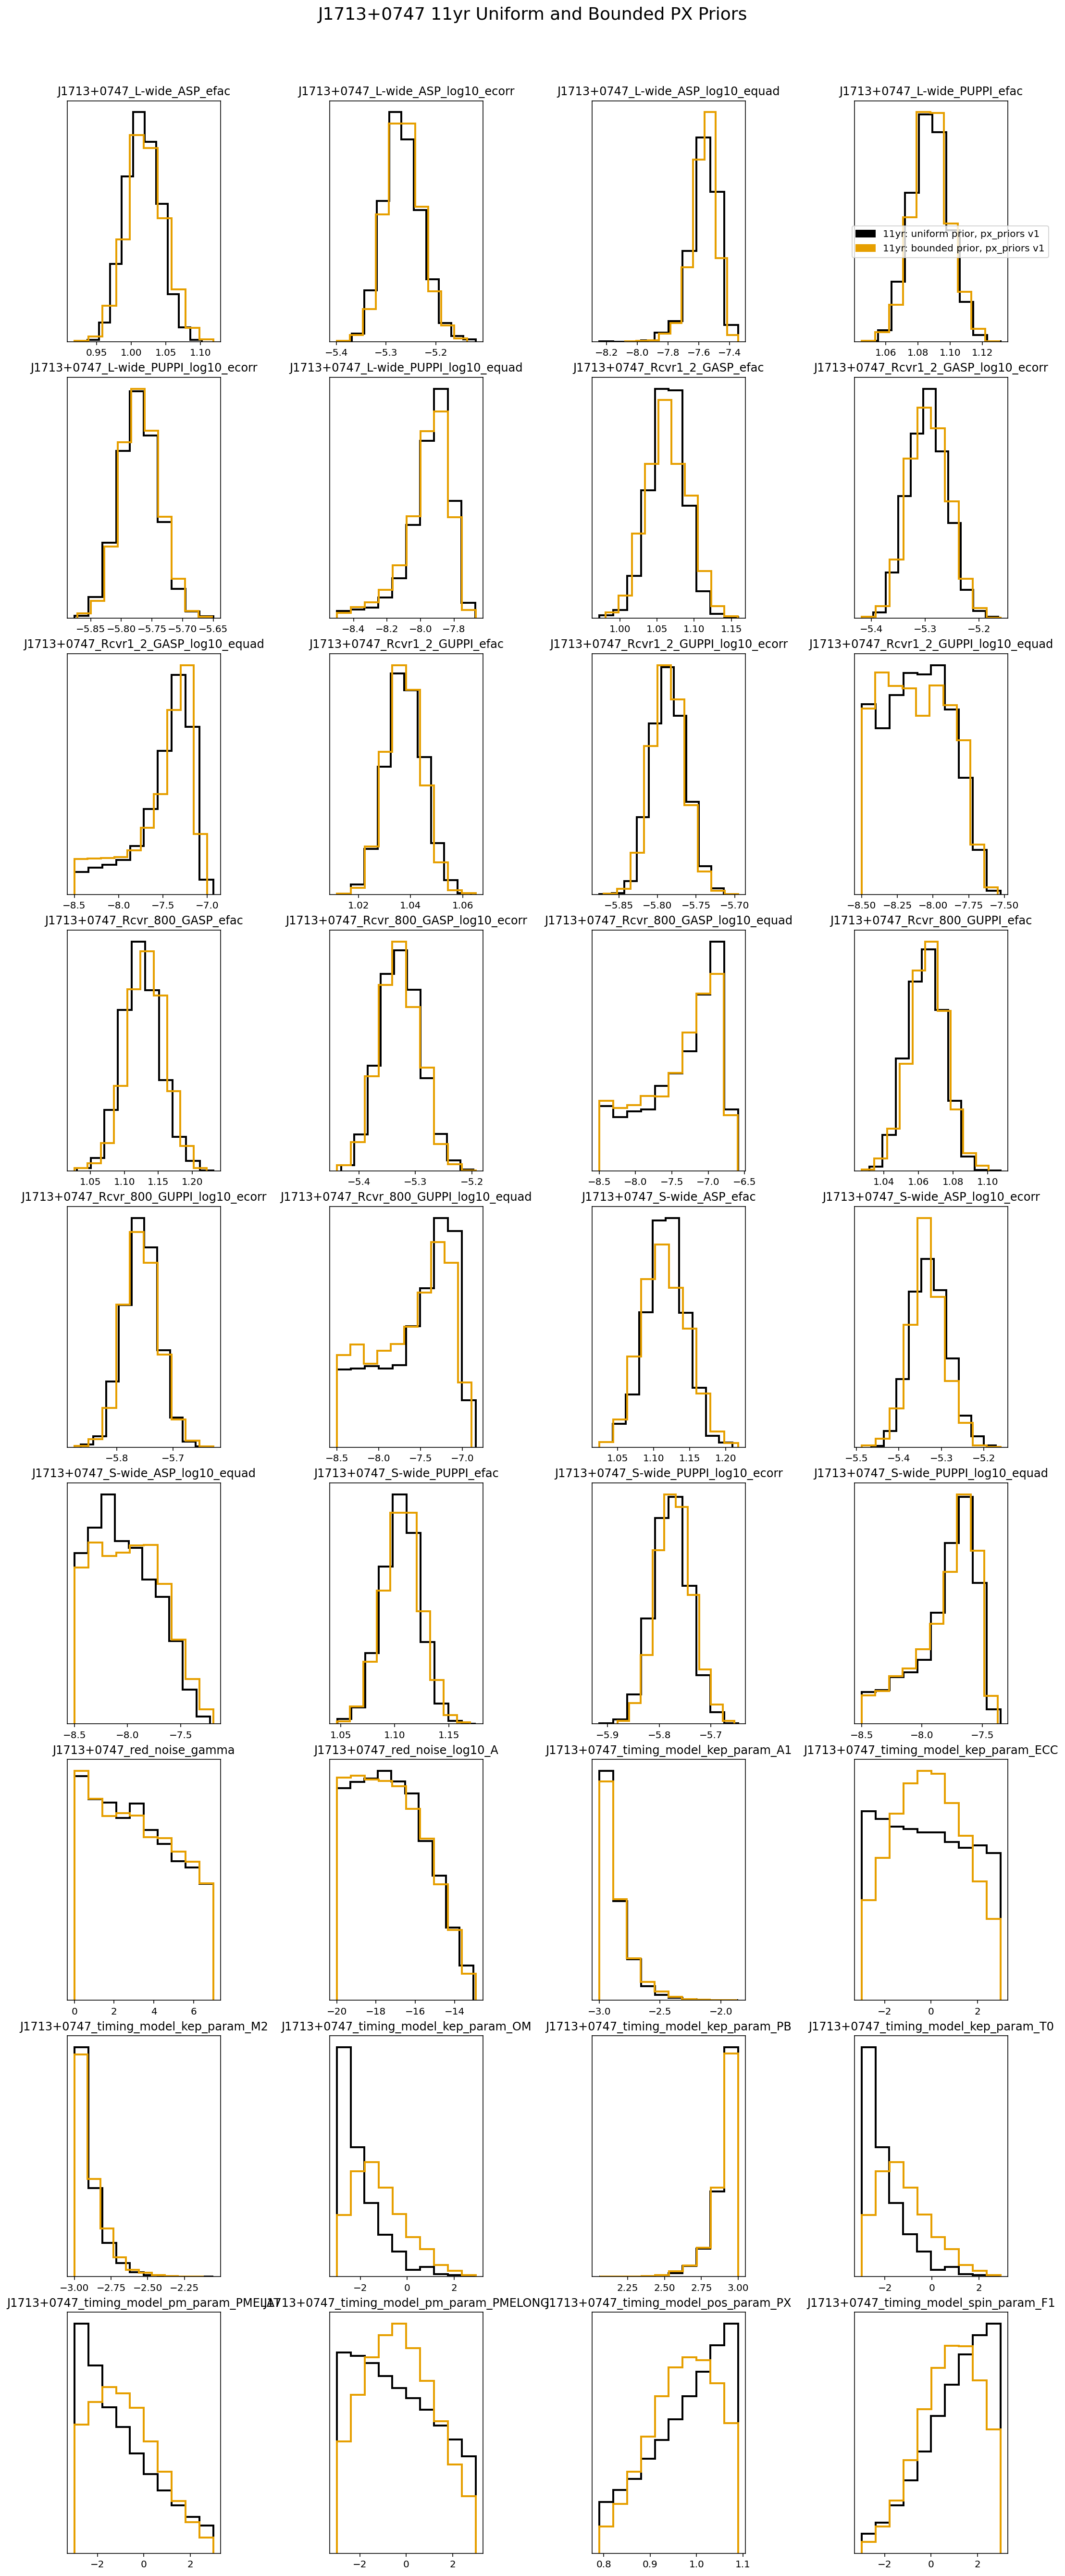

In [20]:
#PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 11yr Uniform and Bounded PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'px_priors','11yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

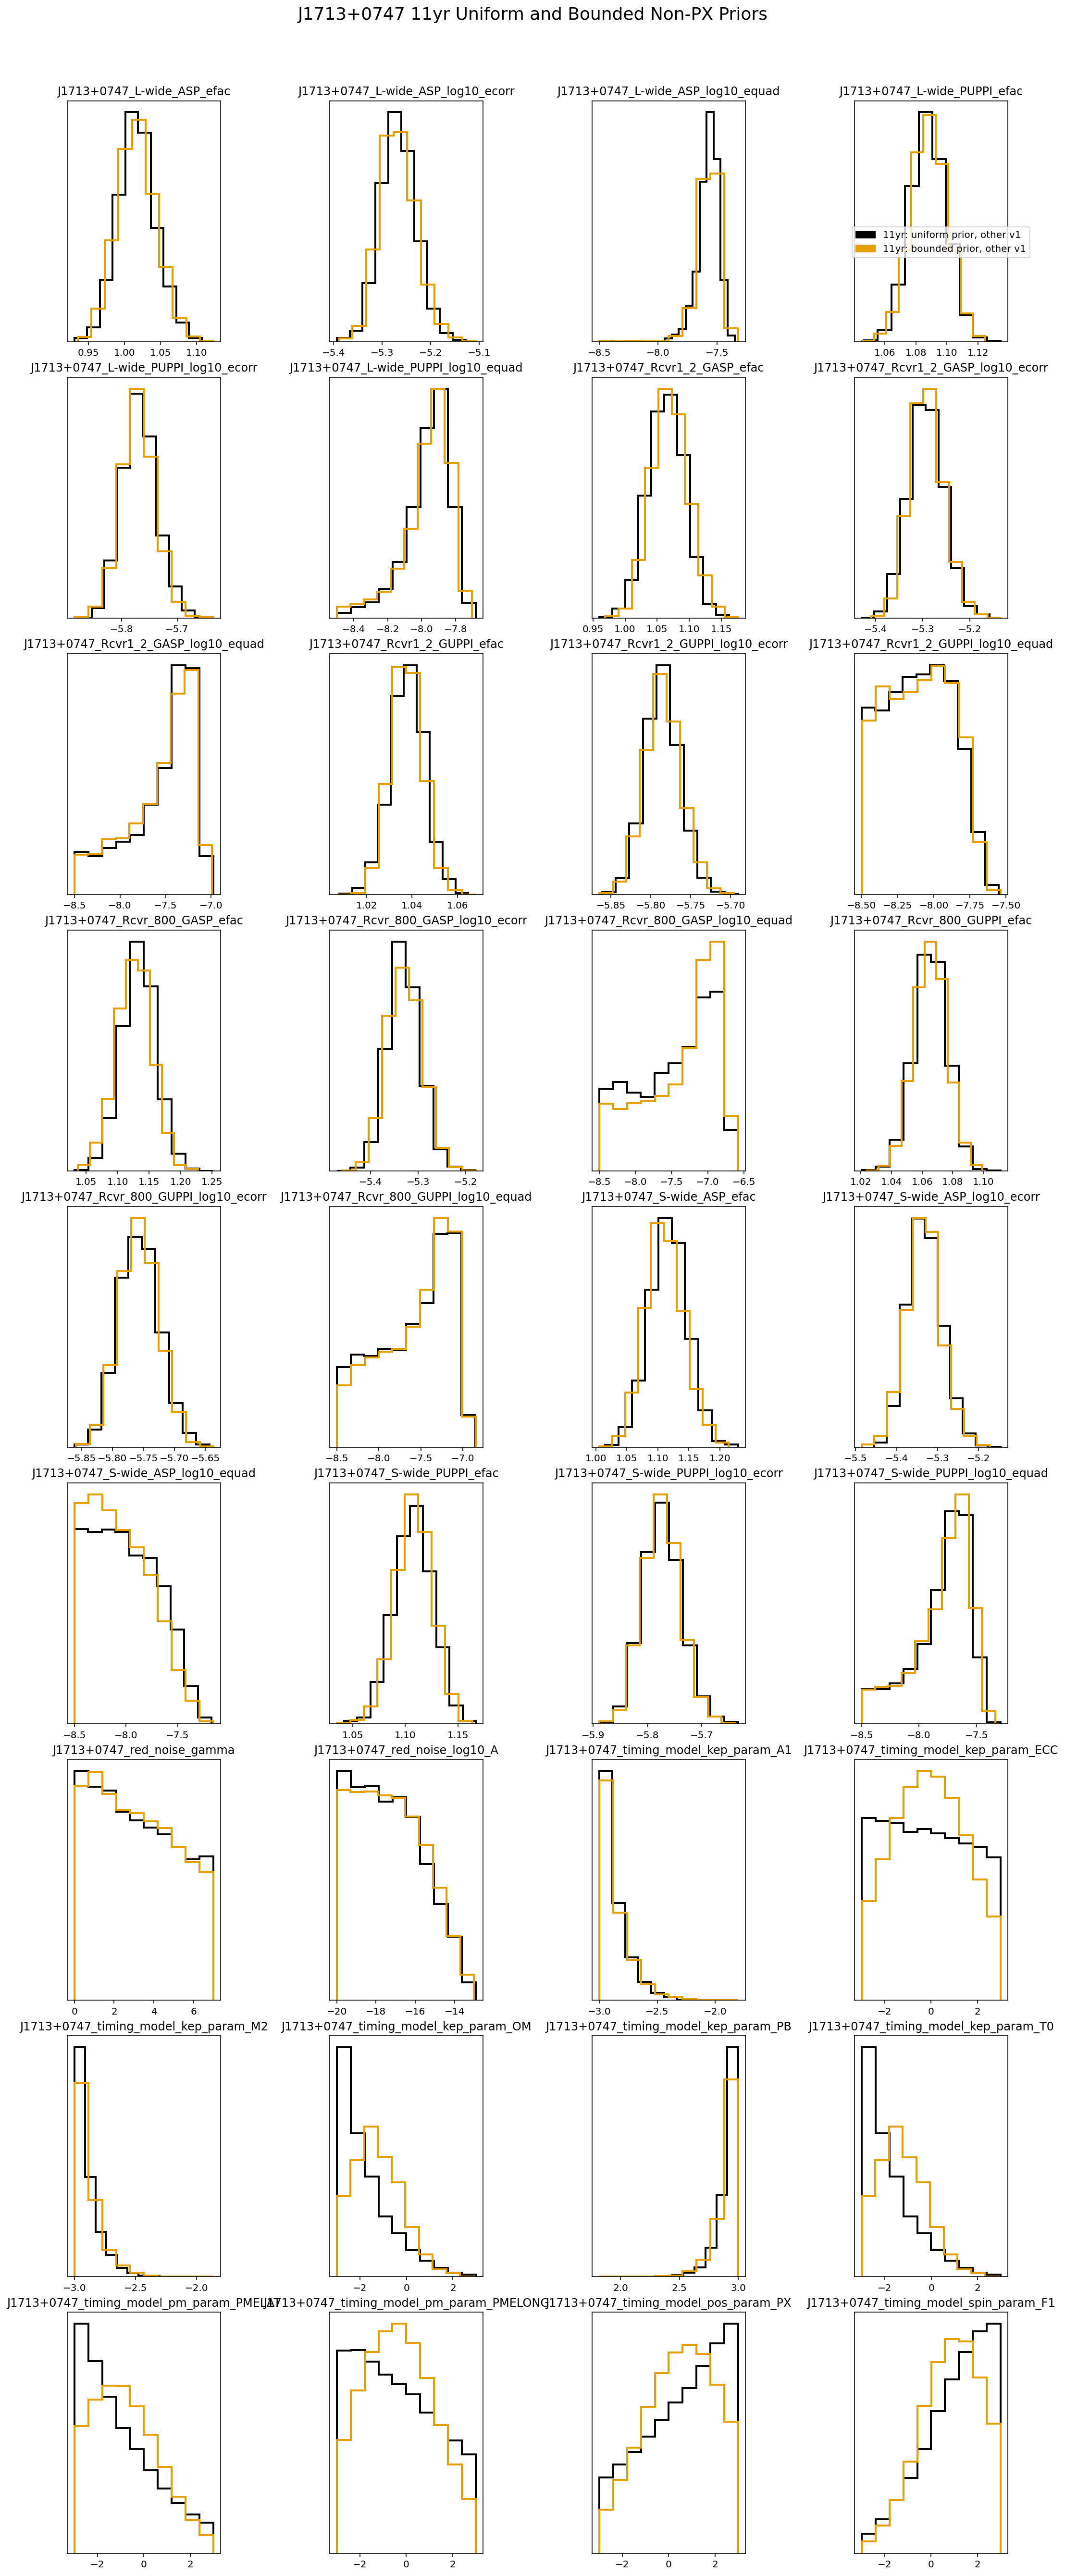

In [21]:
#Non-PX Priors
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 11yr Uniform and Bounded Non-PX Priors'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
nltm.plot_common_chains(core_list,chaindir_list,priors,'other','11yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

# Do Plotting with `arviz`
Making `Arviz` dictionaries to plot all chains

In [22]:
az_comb = nltm.get_combined_arviz_obj_from_dict(chain_dict,psrs)

(149925, 28)
(149925, 42)
(110325, 40)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 149925 and the array at index 1 has size 110325

In [ ]:
print(az_comb.posterior)

In [ ]:
az.plot_trace(az_comb);

# Rescaling the timing parameters to their physical values to properly compare datasets

Have to split into datasets for variable WN
Have to separate by number of parameters, then join

In [ ]:
rescaled_5yr_chain_dict_comb = nltm.get_combined_rescaled_chain_dict(chain_dict,pardict,'5yr')
az_comb_5yr_rescaled = az.convert_to_inference_data(rescaled_5yr_chain_dict_comb)

In [ ]:
rescaled_5yr_core_list_comb = nltm.get_rescaled_chains_as_core_list(rescaled_5yr_chain_dict_comb,psr_name)
five_yr_chaindirs = []
for chaindir in chaindir_list:
    if '5yr' in chaindir.split('/'):
        five_yr_chaindirs.append(chaindir)

In [ ]:
rescaled_9yr_chain_dict_comb = nltm.get_combined_rescaled_chain_dict(chain_dict,pardict,'9yr')
az_comb_9yr_rescaled = az.convert_to_inference_data(rescaled_9yr_chain_dict_comb)

In [ ]:
rescaled_9yr_core_list_comb = nltm.get_rescaled_chains_as_core_list(rescaled_9yr_chain_dict_comb,psr_name)
nine_yr_chaindirs = []
for chaindir in chaindir_list:
    if '9yr' in chaindir.split('/'):
        nine_yr_chaindirs.append(chaindir)

In [ ]:
rescaled_11yr_chain_dict_comb = nltm.get_combined_rescaled_chain_dict(chain_dict,pardict,'11yr')
az_comb_11yr_rescaled = az.convert_to_inference_data(rescaled_11yr_chain_dict_comb)

In [ ]:
rescaled_11yr_core_list_comb = nltm.get_rescaled_chains_as_core_list(rescaled_11yr_chain_dict_comb,psr_name)
eleven_yr_chaindirs = []
for chaindir in chaindir_list:
    if '11yr' in chaindir.split('/'):
        eleven_yr_chaindirs.append(chaindir)

Combine the common parameters for the not donked up datasets

In [ ]:
rescaled_chain_dict_5yr_11yr = {}
for param in rescaled_5yr_chain_dict_comb.keys():
    if param not in ['lnlike','lnprior', 'chain accept', 'pt chain accept']:
        if param in rescaled_11yr_chain_dict_comb.keys():
            rescaled_chain_dict_5yr_11yr[param] = np.concatenate((rescaled_5yr_chain_dict_comb[param],
                                                                  rescaled_11yr_chain_dict_comb[param]),axis=0)

In [ ]:
#az.summary(az_comb_5yr_rescaled)

In [ ]:
#az.summary(az_comb_9yr_rescaled)

## 5yr Plots

`la_forge` plots, then `arviz`

In [ ]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 5yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(rescaled_5yr_core_list_comb,five_yr_chaindirs,priors,px_priors,'5yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

In [ ]:
white_pars_5yr = []
other_pars_5yr = []
for param in rescaled_5yr_chain_dict_comb.keys():
    if param not in ['lnlike','lnprior', 'chain accept', 'pt chain accept']:
        if param.split('_')[-1] in ['efac','equad','ecorr']:
            white_pars_5yr.append(param)
        else:
            other_pars_5yr.append(param)

White Noise Parameters

In [ ]:
az.plot_trace(az_comb_5yr_rescaled,var_names=white_pars_5yr,plot_kwargs={'linewidth':3});

Red + Timing Parameters

In [ ]:
az.plot_trace(az_comb_5yr_rescaled,var_names=other_pars_5yr,plot_kwargs={'linewidth':3});

## 9yr Plots

`la_forge` plots, then `arviz`

In [ ]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 9yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(rescaled_9yr_core_list_comb,nine_yr_chaindirs,priors,px_priors,'9yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

In [ ]:
white_pars_9yr = []
other_pars_9yr = []
for param in rescaled_9yr_chain_dict_comb.keys():
    if param not in ['lnlike','lnprior', 'chain accept', 'pt chain accept']:
        if param.split('_')[-1] in ['efac','equad','ecorr']:
            white_pars_9yr.append(param)
        else:
            other_pars_9yr.append(param)

White noise parameters

In [ ]:
az.plot_trace(az_comb_9yr_rescaled,var_names=white_pars_9yr,plot_kwargs={'linewidth':3});

Red + Timing Parameters

In [ ]:
az.plot_trace(az_comb_9yr_rescaled,var_names=other_pars_9yr,plot_kwargs={'linewidth':3});

## 11yr Plots

`la_forge` plots, then `arviz`

In [ ]:
#All Runs
core_kwargs = {'hist':True, 'ncols':4, 'title_y':1.03,
               'suptitle':'{} 11yr All Runs'.format(psrlist[0]),
               'bins':10,'hist_kwargs':dict(fill=False),'linewidth':2.}
misc_kwargs = {'legend_on':True,'legend_loc':(.8,.9)}
priors = ['uniform','bounded']
px_priors = ['other','px_priors']
nltm.plot_common_chains(rescaled_11yr_core_list_comb,eleven_yr_chaindirs,priors,px_priors,'11yr',
                        plot_kwargs=core_kwargs,misc_kwargs=misc_kwargs)

In [ ]:
white_pars_11yr = []
other_pars_11yr = []
for param in rescaled_11yr_chain_dict_comb.keys():
    if param not in ['lnlike','lnprior', 'chain accept', 'pt chain accept']:
        if param.split('_')[-1] in ['efac','equad','ecorr']:
            white_pars_11yr.append(param)
        else:
            other_pars_11yr.append(param)

White noise parameters

In [ ]:
az.plot_trace(az_comb_11yr_rescaled,var_names=white_pars_11yr,plot_kwargs={'linewidth':3});

Red + Timing Parameters

In [ ]:
az.plot_trace(az_comb_11yr_rescaled,var_names=other_pars_11yr,plot_kwargs={'linewidth':3});

## Combined 5yr+11yr Plots

In [ ]:
labels = ['5yr,uniform prior','5yr,bounded prior','11yr,uniform prior','5yr,bounded prior']
az.plot_trace(rescaled_chain_dict_5yr_11yr,legend=True,figsize=(15,2*len(rescaled_chain_dict_5yr_11yr.keys())),
             plot_kwargs={'linewidth':3});